# Aykırı Gözlem
Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemlerden oldukça farklı olan gözlemlere aykırı gözlem denir.

---

#### Aykırı Değer Nedir ?
Aykırılığı ifade eden nümerik değere aykırı değer denir.

---

#### Aykırı Değer Neye Sebep Olur?
Genellenebilirlik kaygısı ile oluşturulan kural setlerini ya da fonksiyonları yanıltır. Yanlılığa sebep olur.

---

#### Neye Göre Kime Göre Aykırı Gözlem?
Veride genel eğilimin oldukça dışına çıkan gözlemler.

---


## Tek Değişkenli Aykırı Gözlem Analizi

In [19]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df = df.select_dtypes(include=['float64','int64'])
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


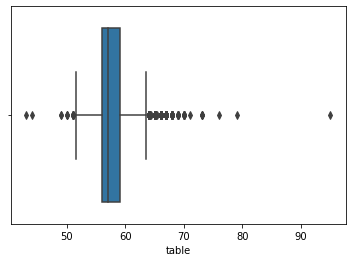

In [20]:
df_table = df["table"].copy()
sns.boxplot(x=df_table);

In [21]:
Q1 = df_table.quantile(0.25) # ilk 25'lik değeri seçmiş olacak
Q3 = df_table.quantile(0.75) # üçüncü 25'lik değeri seçmiş olacak
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5*IQR
alt_sinir

51.5

In [22]:
ust_sinir = Q3 + 1.5*IQR
ust_sinir

63.5

In [23]:
(df_table < (alt_sinir)) | (df_table > (ust_sinir))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [24]:
df_table < (alt_sinir)

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [25]:
aykiri_tf = df_table < (alt_sinir)

In [29]:
df_table[aykiri_tf].head()

1515    51.0
3238    50.1
3979    51.0
4150    51.0
5979    49.0
Name: table, dtype: float64

In [ ]:
aykirilar = df_table[aykiri_tf]